In [7]:
from __future__ import print_function # so print doesn't show brackets
import numpy as np
import itertools as itr

import os as os
import sys as sys 
import pandas as pd
import warnings
import time as time
import random
import pickle
pickle.HIGHEST_PROTOCOL = 2
sys.path.append(os.path.join("..", "Libraries","QML_lib"))
from RedisSettings import *
import Evo as evo
import DataBase 
from QMD import QMD #  class moved to QMD in Library
import QML
import ModelGeneration 
import BayesF
import matplotlib.pyplot as plt
import PlotQMD as ptq
#from pympler import asizeof
import matplotlib.pyplot as plt
paulis = ['x', 'y', 'z'] # will be chosen at random. or uncomment below and comment within loop to hard-set

import viz_library as v
import time as time 
import argparse

parser = argparse.ArgumentParser(description='Pass variables for (I)QLE.')

import warnings
warnings.filterwarnings("ignore")


In [5]:
only_adjacent_branches=True
directed = False
modlist = None
save_to_file = None

mydir = 'Results/5particlesTest/'
qmd=pickle.load(open(mydir+'qmd_class_001.p', "rb"))
res=pickle.load(open(mydir+'results_001.p', "rb"))
global_avgs = pickle.load(open(mydir+'global_bayes_avg.p', 'rb'))
global_model_ids = pickle.load(open(mydir+'global_model_ids.p', 'rb'))

In [6]:
global_model_ids

{'xTi': 1,
 'xTiPPxTxPPxTyPPxTzPPyTiPPyTyPPyTzPPzTiPPzTz': 18,
 'xTiPPxTxPPxTyPPxTzPPyTiPPyTyPPzTiPPzTz': 17,
 'xTiPPxTxPPxTyPPyTiPPyTyPPzTiPPzTz': 14,
 'xTiPPxTxPPxTzPPyTiPPyTyPPyTzPPzTiPPzTz': 16,
 'xTiPPxTxPPxTzPPyTiPPyTyPPzTiPPzTz': 13,
 'xTiPPxTxPPyTiPPyTyPPyTzPPzTiPPzTz': 15,
 'xTiPPxTxPPyTiPPyTyPPzTi': 10,
 'xTiPPxTxPPyTiPPyTyPPzTiPPzTz': 12,
 'xTiPPxTxPPyTiPPzTi': 7,
 'xTiPPxTxPPyTiPPzTiPPzTz': 11,
 'xTiPPyTi': 4,
 'xTiPPyTiPPyTyPPzTi': 8,
 'xTiPPyTiPPyTyPPzTiPPzTz': 20,
 'xTiPPyTiPPzTi': 6,
 'xTiPPyTiPPzTiPPzTz': 9,
 'xTiPPzTi': 5,
 'yTi': 2,
 'yTiPPzTi': 19,
 'zTi': 3}

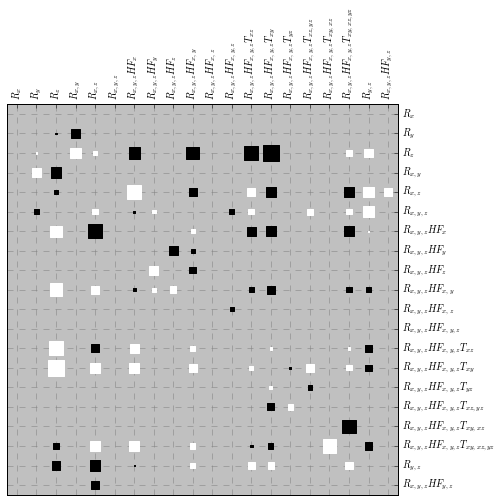

In [9]:
global_names_by_mod = {v:k for k,v in global_model_ids.items()}
ptq.plotHinton(global_names_by_mod, global_avgs)

In [10]:
global_avgs

{1: {2: [0.96516329537577206], 3: [0.41589137126147258]},
 2: {1: [1.0360941042734793],
  3: [3.9546534197238841],
  4: [1.2458884863702808],
  6: [0.21781266708799346],
  9: [0.1369384827849883],
  12: [0.10343130286058874],
  13: [0.053156174497781046],
  17: [1.6408656082895854],
  18: [2.3174619174540725],
  20: [0.30670786371315828]},
 3: {1: [2.4044740263949742], 2: [0.25286665956932847]},
 4: {2: [0.83177337445309574],
  6: [10.725196681154955],
  9: [0.47392337768192472],
  12: [2.3131431520749488],
  13: [0.31763080594172205],
  17: [0.33045120667194805],
  18: [3.689180696656889],
  19: [1.9239522598201666],
  20: [1.4429350459417165]},
 5: {1: [0.76695542056314048],
  4: [1.4349460107829963],
  6: [0.95549728358247177],
  7: [1.1780103816122587],
  11: [0.77440870150848151],
  12: [1.4827587609637367],
  15: [1.5721181714524437],
  17: [1.4102936449570873],
  18: [3.631182513837353]},
 6: {2: [4.5911012126581836],
  4: [0.094308271935272497],
  9: [1.1691126100928764],
  12: